In [22]:
# Install the local package in editable mode so 'src' can be imported
%pip install -e .

Obtaining file:///C:/Users/hp/Desktop/end_to_end_mlops/notesbooks
Note: you may need to restart the kernel to use updated packages.


ERROR: file:///C:/Users/hp/Desktop/end_to_end_mlops/notesbooks does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ensure project root (parent of notebooks) is on sys.path so src can be resolved
project_root = os.path.dirname(os.getcwd())
if project_root not in sys.path:
	sys.path.insert(0, project_root)

from src.data import strategie_univarie,strategie_analyses

In [3]:
# build a path relative to the notebook folder (notesbooks -> project root)
project_root = os.path.dirname(os.getcwd())  # parent of notesbooks
candidate = os.path.join(project_root, 'data', 'raw', 'titanic.csv')

# if the candidate does not exist, search the project tree for the file
if not os.path.exists(candidate):
	found = None
	for root, _, files in os.walk(project_root):
		if 'titanic.csv' in files:
			found = os.path.join(root, 'titanic.csv')
			break
	if found:
		candidate = found
	else:
		raise FileNotFoundError(f"dfall.csv not found. Searched: {candidate} and project tree under {project_root}")

# load the dataframe
df = pd.read_csv(candidate)
print(f"Loaded df from: {candidate}")

Loaded df from: c:\Users\hp\Desktop\end_to_end_mlops\data\raw\titanic.csv


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
strategie_analyses.StrategieMultipleValues().missing(df)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
strategie_analyses.StrategieMultipleValues().descibtion(df)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## L'age preprocessing

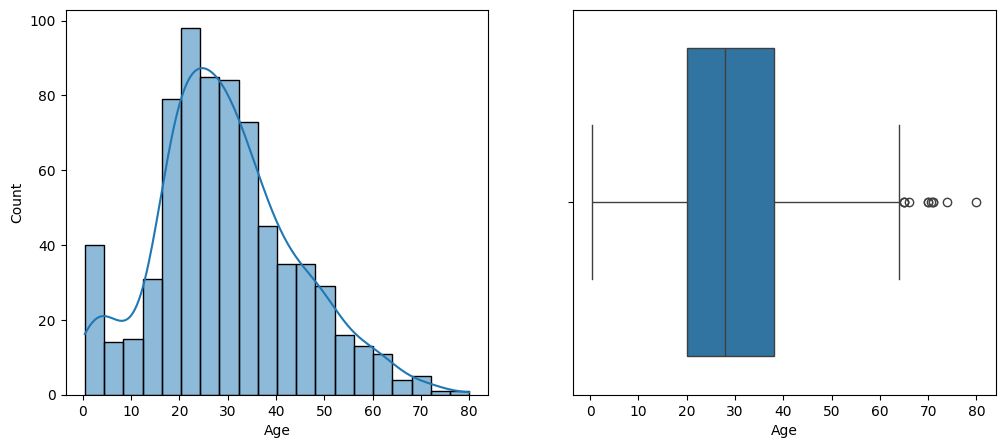

In [7]:
name='Age'
number_strategie = strategie_univarie.StrategieNumberValue()
number_strategie.plot_distribution(df, name)

In [8]:
number_strategie.missing_value(df, name)
df[name]= df[name].astype(int)
number_strategie.outliers_management(df, name)

Age has 177 missing values
0


c:\Users\hp\Desktop\end_to_end_mlops\src\data\strategie_univarie.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[name]<lower_bound),name]=lower_bound


In [9]:
number_strategie.missing_value(df, name)

Age has no missing values


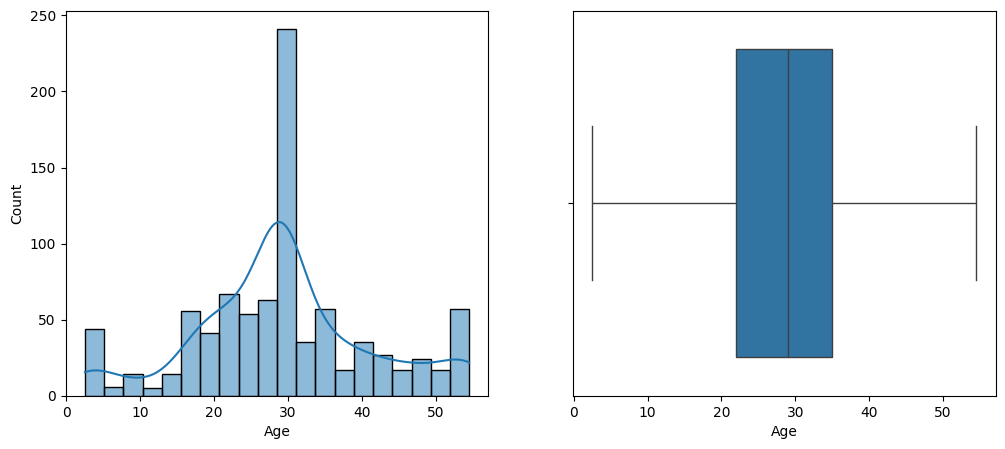

In [10]:
number_strategie.plot_distribution(df, name)

c:\Users\hp\Desktop\end_to_end_mlops\env\Lib\site-packages\sklearn\preprocessing\_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\hp\AppData\Local\Temp\ipykernel_31588\835608764.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Age_quantile', palette='Set2', kde=True,bins=30)


<Axes: xlabel='Age_quantile', ylabel='Count'>

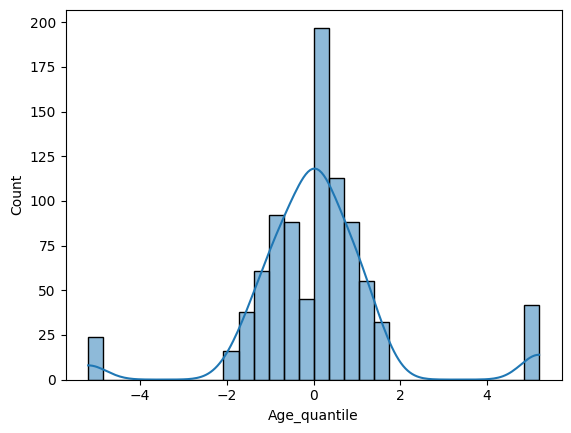

In [11]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')

df[['Age_quantile']] = scaler.fit_transform(df[['Age']])

sns.histplot(data=df, x='Age_quantile', palette='Set2', kde=True,bins=30)

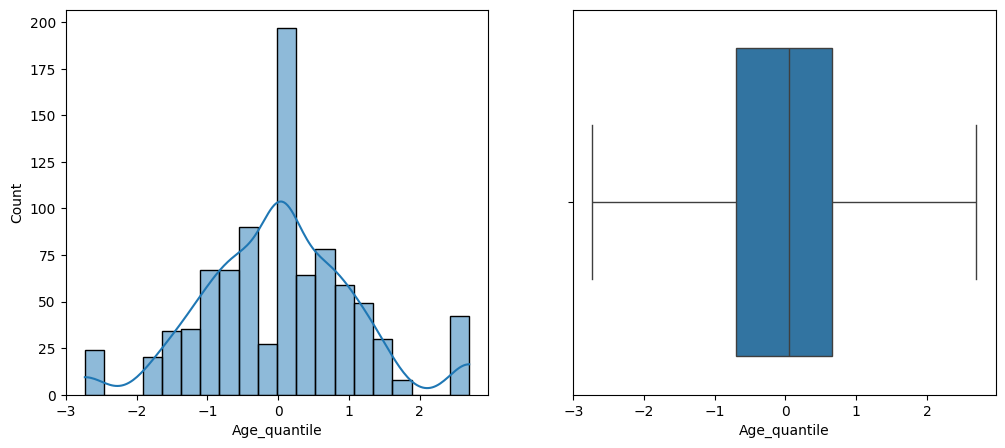

In [12]:
number_strategie.outliers_management(df, 'Age_quantile')
number_strategie.plot_distribution(df, 'Age_quantile')

## Cabin preprocessing

In [13]:
name='Cabin'
ctg_strategie = strategie_univarie.StrategieCategoricalValue()
ctg_strategie.description(df, name)

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64


In [14]:
ctg_strategie.missing_value(df, name)

Cabin has 687 missing values
0


In [15]:
ctg_strategie.missing_value(df, name)

Cabin has no missing values


## Embarked preprocessing

In [16]:
name='Embarked'
ctg_strategie.description(df, name)

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Embarked has 2 missing values
0


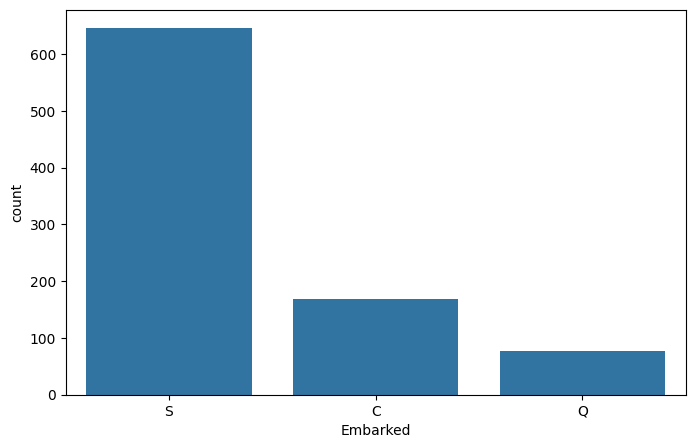

In [17]:
ctg_strategie.missing_value(df, name)
ctg_strategie.plot_distribution(df, name)

## SibSp

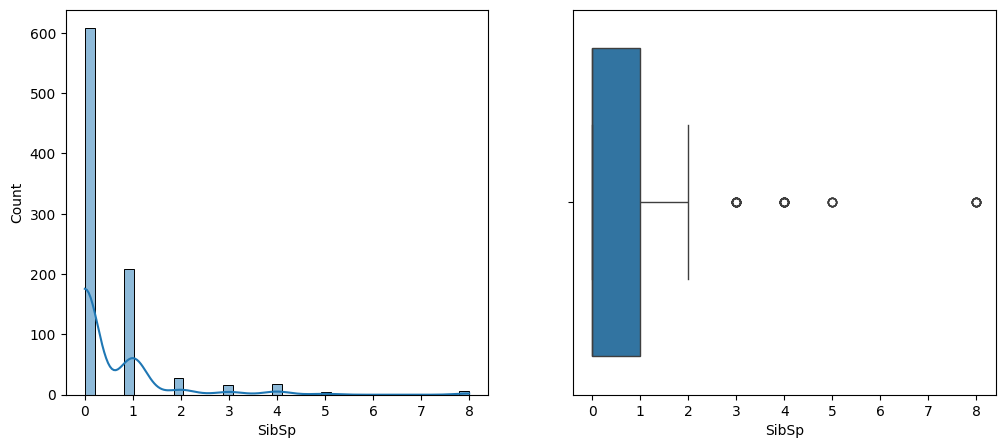

In [18]:
name='SibSp'
number_strategie.plot_distribution(df, name)

In [19]:
number_strategie.description(df, name)

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


SibSp has no missing values


c:\Users\hp\Desktop\end_to_end_mlops\src\data\strategie_univarie.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[name]<lower_bound),name]=lower_bound


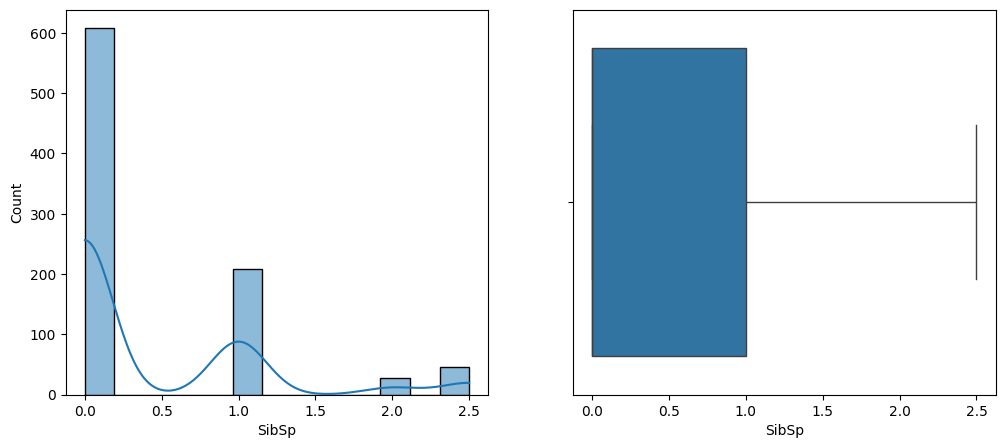

In [20]:
number_strategie.missing_value(df, name)
number_strategie.outliers_management(df, name)
number_strategie.plot_distribution(df, name)

## Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


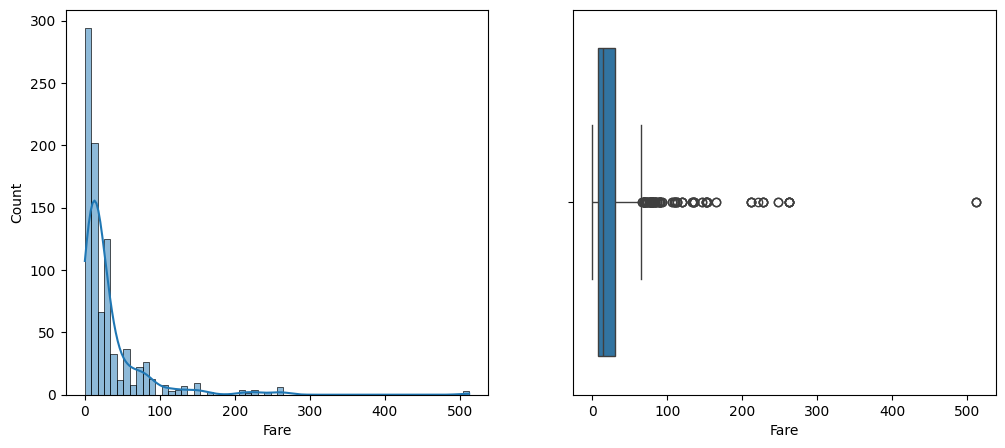

In [21]:
name='Fare'
number_strategie.description(df, name)
number_strategie.plot_distribution(df, name)

In [22]:
number_strategie.missing_value(df, name)

Fare has no missing values


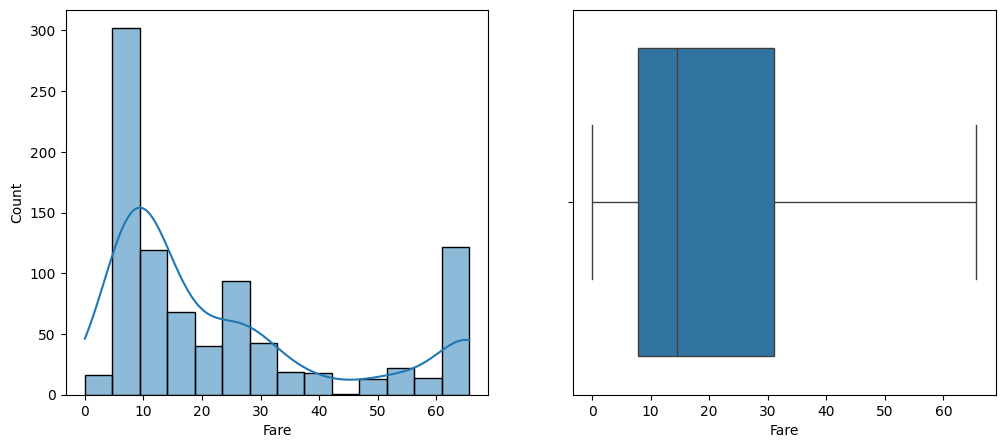

In [23]:
number_strategie.outliers_management(df, name)
number_strategie.plot_distribution(df, name)

c:\Users\hp\Desktop\end_to_end_mlops\env\Lib\site-packages\sklearn\preprocessing\_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


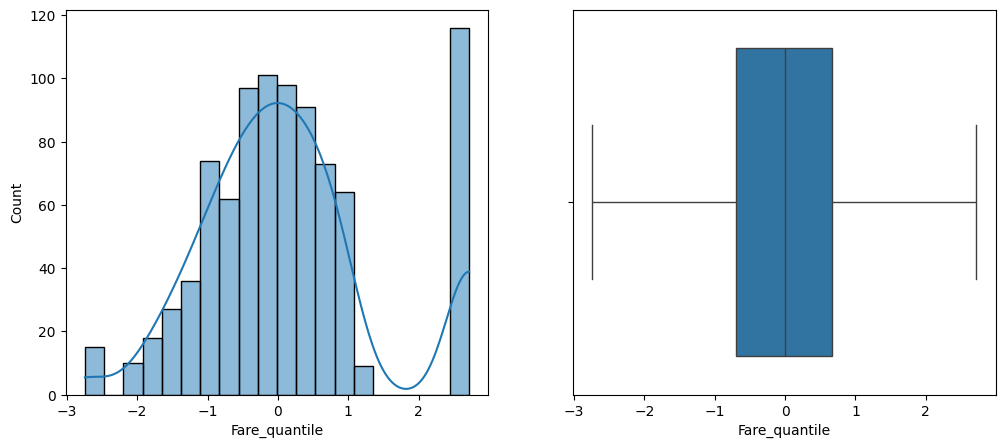

In [24]:
qt_fare= QuantileTransformer(output_distribution='normal')
df['Fare_quantile'] = qt_fare.fit_transform(df[['Fare']])
number_strategie.outliers_management(df, 'Fare_quantile')
number_strategie.plot_distribution(df, 'Fare_quantile')

In [25]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_quantile,Fare_quantile
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,B96 B98,S,-0.695859,-1.373288
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C,0.823696,2.719808
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S,-0.391395,-0.644732
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S,0.662165,0.989391
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,B96 B98,S,0.662165,-0.537371
5,6,0,3,"Moran, Mr. James",male,29.0,0.0,0,330877,8.4583,B96 B98,Q,0.046488,-0.445194
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0,17463,51.8625,E46,S,1.628727,0.931325
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.5,2.5,1,349909,21.0750,B96 B98,S,-2.732897,0.246083
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2,347742,11.1333,B96 B98,S,-0.337215,-0.228701
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0,237736,30.0708,B96 B98,C,-1.387897,0.639540


In [26]:
strategie_analyses.StrategieMultipleValues().missing(df)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Age_quantile     0
Fare_quantile    0
dtype: int64


In [27]:
# Save df
df.to_csv(os.path.join(project_root, 'data', 'interim', 'titanic_pre_univarie.csv'), index=False)